In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
dataset = pd.read_csv("./dataset/feature_engineering.csv", header=0)
dataset.head(3)

,programme,mlcourse,ircourse,statcourse,dbcourse,knowledge,stress,bedtime,bedtime_segment,sporthours,activity_intensity,byear,age,mental_age,mental_biological_age,gender,chatGPT,random,bmonth
0,unknown,no,no,mu,nee,6,42.242203,01:00,Late Night,10.0,High,1999,25,27,older,female,yes,360.0,3.0
1,unknown,no,no,mu,nee,6,35.000000,01:00,Late Night,4.0,Moderate,1994,30,33,older,female,yes,47.0,10.0
2,artificial intelligence,yes,yes,mu,ja,14,76.000000,00:00,Late Night,0.0,Low,1996,28,36,older,female,not willing to say,35.0,4.0


In [94]:
X = dataset[dataset["programme"] != "unknown"].drop(["bedtime","random"], axis=1)
#v = X["programme"].value_counts()
#X = X[X["programme"].isin(v.index[v.gt(5)])]

cats = ["mlcourse","ircourse", "statcourse","dbcourse","gender","chatGPT","bedtime_segment",
            "programme","activity_intensity","mental_biological_age"]
cats_labels = {}

for var in cats:
    posvars = []
    newcol = []  
    for line in X.index:
        if not X.loc[line,var] in posvars:
            posvars.append(X.loc[line,var])
        newcol.append(posvars.index(X.loc[line,var]))
    #print(f"{var} new ordering: {posvars}")
    cats_labels[var] = posvars
    X[var] = newcol

target = "activity_intensity"
y = X[target]
X = X.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

param_grid = {"max_depth":[2,3,4,5,7,9,None]}
estim = tree.DecisionTreeClassifier()

prog_tree_sh = GridSearchCV(estim, param_grid=param_grid, cv=5).fit(X_train, y_train)


1.0
{'max_depth': 2}


[Text(0.6, 0.8333333333333334, 'x[8] <= 6.5\ngini = 0.658\nsamples = 110\nvalue = [31.0, 45.0, 34.0]'),
 Text(0.4, 0.5, 'x[8] <= 2.5\ngini = 0.483\nsamples = 76\nvalue = [31, 45, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

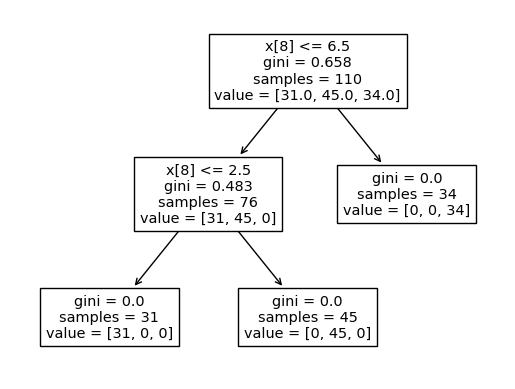

In [95]:
print(prog_tree_sh.best_score_)
print(prog_tree_sh.best_params_)
tree.plot_tree(prog_tree_sh.best_estimator_)

99.0909090909091
[[42  0  0]
 [ 0 44  1]
 [ 0  0 23]]


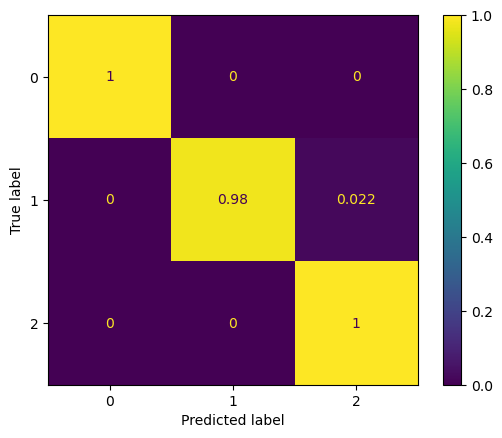

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
y_hat = prog_tree_sh.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_hat)*100)
cm = confusion_matrix(y_test, y_hat)
print(cm)
ConfusionMatrixDisplay(cm / cm.sum(axis=1)[:,None]).plot()


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_hat = prog_tree_sh.best_estimator_.predict(X_test)
print(mean_squared_error(y_test, y_hat))
print(mean_absolute_error(y_test, y_hat))




382.5407767455322
12.19772469629157
